In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Train the model using a Neural Network: Neural networks can effectively handle large and high-dimensional datasets, especially when there are complex, nonlinear relationships in the data. They use multiple layers to automatically learn and capture intricate patterns that may not be linearly separable or identifiable by simpler models.

In [5]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv') 

In [6]:
# Separate features and target
X = df.drop(columns=['popular'])
y = df['popular']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the neural network

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
#install tensorflow
!pip install tensorflow

In [ ]:
# Build the model
model = Sequential()
# Dense input layer of 64 neurons with relu activation function 
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
# 30% dropout layer
model.add(Dropout(0.3))
# Hidden layer of 32 neurons with relu activation function
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification


c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The dense input layer takes in the input data, which has a shape of (X_train.shape[1],) representing the number of features in each sample. The 64 neurons in this layer learn 64 different aspects of the input, creating various representations of the data. The ReLU activation function is applied here to introduce non-linearity, allowing the model to learn complex patterns.

Dropout is a regularization technique that randomly "drops out" or deactivates 30% of the neurons in the previous layer during each training iteration. This helps prevent the model from overfitting by ensuring that it does not rely too heavily on specific neurons. Instead, it learns to generalize better, which is especially important with large datasets.
Hidden Layer with Dense Layer (32 Neurons):

Purpose: The dense hidden layer further processes the learned features from the previous layer. It uses 32 neurons to reduce the dimensionality slightly, encouraging the model to focus on the most relevant features. The ReLU activation function allows for learning additional nonlinear relationships in the data.

The second dropout layer deactivates 30% of the neurons in the previous hidden layer to continue regularization, further reducing the risk of overfitting and enhancing the model’s ability to generalize.

Purpose: The output layer has a single neuron with a sigmoid activation function, which is commonly used for binary classification. This activation function outputs a probability score between 0 and 1, which can be interpreted as the likelihood that the input sample belongs to the "popular" class. A threshold (often 0.5) can be applied to decide if a song is classified as "popular" or "not popular."

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Adam (Adaptive Moment Estimation) is a popular optimization algorithm that adjusts the learning rate for each parameter individually. It combines the benefits of two other optimizers, AdaGrad and RMSProp, and is effective for handling sparse gradients and noisy data. Adam generally leads to faster and more stable convergence in neural networks.

Binary Cross-Entropy is used as the loss function for binary classification tasks. It calculates the difference between the true label (0 or 1) and the predicted probability from the model. This loss function penalizes incorrect predictions more heavily, helping the model learn to distinguish between the two classes (popular vs. not popular) effectively.

Accuracy is used here as the evaluation metric to measure how often the model’s predictions match the true labels. During training and validation, accuracy provides a quick and interpretable measure of how well the model is performing in terms of correct classifications.

Train the model using EarlyStopping to automatically stop training when the model is no longer improving

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Set early stopping to monitor validation loss with patience for some epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 9s 941us/step - accuracy: 0.8526 - loss: 0.4285 - val_accuracy: 0.8520 - val_loss: 0.4162
Epoch 2/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 953us/step - accuracy: 0.8534 - loss: 0.4151 - val_accuracy: 0.8520 - val_loss: 0.4160
Epoch 3/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 931us/step - accuracy: 0.8544 - loss: 0.4122 - val_accuracy: 0.8520 - val_loss: 0.4154
Epoch 4/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 949us/step - accuracy: 0.8534 - loss: 0.4132 - val_accuracy: 0.8520 - val_loss: 0.4151
Epoch 5/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 950us/step - accuracy: 0.8550 - loss: 0.4100 - val_accuracy: 0.8520 - val_loss: 0.4146
Epoch 6/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 947us/step - accuracy: 0.8548 - loss: 0.4100 - val_accuracy: 0.8520 - val_loss: 0.4143
Epoch 7/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 952us/step - accuracy: 0.8535 - loss: 0.4122 - val_accuracy: 0.8520 - val_loss: 0.4142
Epoch 8/50
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 953us/step - accuracy: 0.8536 -

Visualize the training process

In [14]:
import matplotlib.pyplot as plt


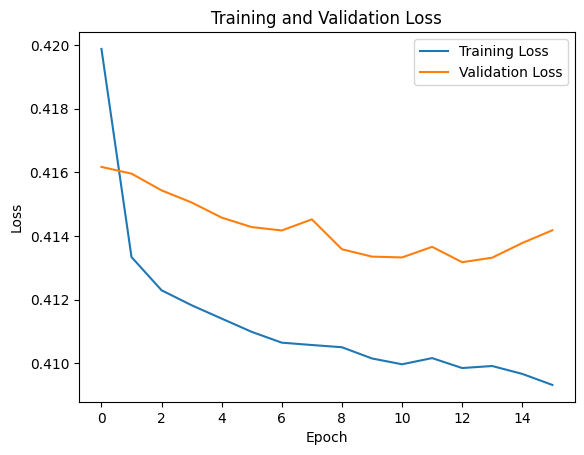

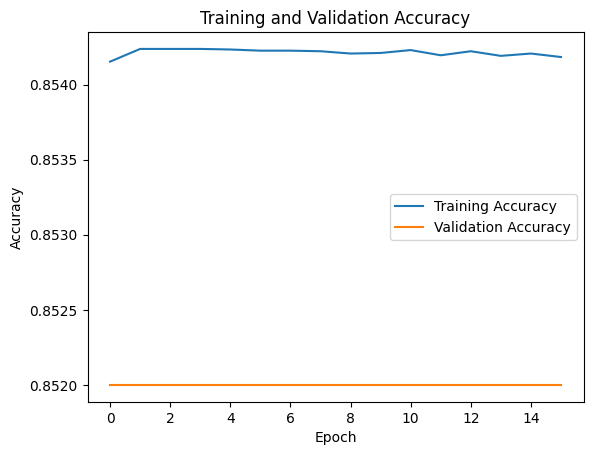

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Reduce the learning rate

In [16]:
from tensorflow.keras.optimizers import Adam

# Set a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


Increase epochs

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with increased epochs and early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[early_stopping], verbose=1)


Epoch 1/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 9s 958us/step - accuracy: 0.8529 - loss: 0.4114 - val_accuracy: 0.8520 - val_loss: 0.4129
Epoch 2/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 958us/step - accuracy: 0.8536 - loss: 0.4093 - val_accuracy: 0.8520 - val_loss: 0.4128
Epoch 3/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 946us/step - accuracy: 0.8538 - loss: 0.4090 - val_accuracy: 0.8520 - val_loss: 0.4126
Epoch 4/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 946us/step - accuracy: 0.8551 - loss: 0.4077 - val_accuracy: 0.8520 - val_loss: 0.4125
Epoch 5/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 929us/step - accuracy: 0.8551 - loss: 0.4069 - val_accuracy: 0.8520 - val_loss: 0.4126
Epoch 6/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 992us/step - accuracy: 0.8544 - loss: 0.4082 - val_accuracy: 0.8520 - val_loss: 0.4125
Epoch 7/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 1000us/step - accuracy: 0.8549 - loss: 0.4072 - val_accuracy: 0.8520 - val_loss: 0.4126
Epoch 8/30
8120/8120 ━━━━━━━━━━━━━━━━━━━━ 8s 973us/step - accuracy: 0.8532 

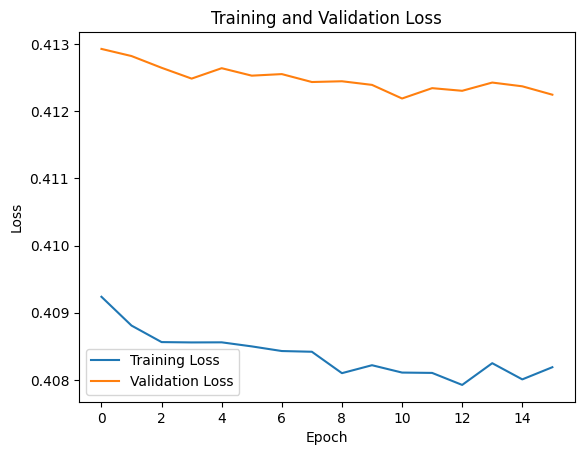

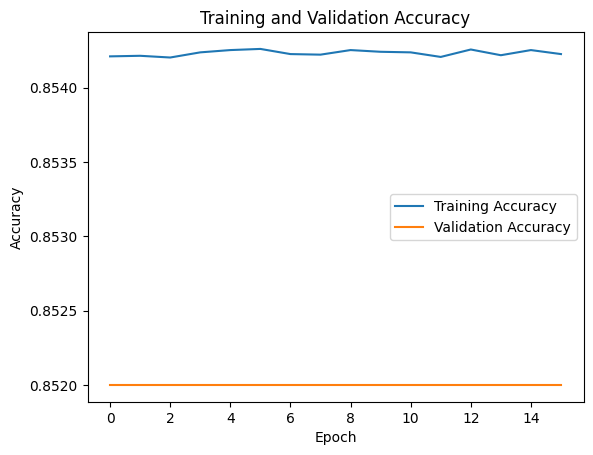

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This has a better performance than before

Evaluate the model

In [19]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")


2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8532 - loss: 0.4104
Test Accuracy: 0.85
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step


Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[55340     0]
 [ 9613     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     55340
           1       0.00      0.00      0.00      9613

    accuracy                           0.85     64953
   macro avg       0.43      0.50      0.46     64953
weighted avg       0.73      0.85      0.78     64953



c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The confusion matrix shows that this model doesn't predict any of the popular songs

I need to address class imbalance

Oversampling: increasing the number of instances in the minority class. The SMOTE (Synthetic Minority Over-sampling Technique) method which generates synthetic examples.

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [22]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np

In [24]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Train the model
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 13s 844us/step - accuracy: 0.5491 - loss: 0.6845 - val_accuracy: 0.5257 - val_loss: 0.6934
Epoch 2/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 12s 837us/step - accuracy: 0.5812 - loss: 0.6715 - val_accuracy: 0.4923 - val_loss: 0.7149
Epoch 3/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 12s 833us/step - accuracy: 0.6002 - loss: 0.6613 - val_accuracy: 0.5640 - val_loss: 0.6770
Epoch 4/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 12s 842us/step - accuracy: 0.6067 - loss: 0.6569 - val_accuracy: 0.5444 - val_loss: 0.6903
Epoch 5/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 22s 950us/step - accuracy: 0.6136 - loss: 0.6522 - val_accuracy: 0.5764 - val_loss: 0.6710
Epoch 6/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 11s 824us/step - accuracy: 0.6188 - loss: 0.6486 - val_accuracy: 0.6103 - val_loss: 0.6491
Epoch 7/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 12s 833us/step - accuracy: 0.6219 - loss: 0.6462 - val_accuracy: 0.5783 - val_loss: 0.6728
Epoch 8/20
13872/13872 ━━━━━━━━━━━━━━━━━━━━ 12s 836us/s

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

2030/2030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
 [[34926 20414]
 [ 4891  4722]]


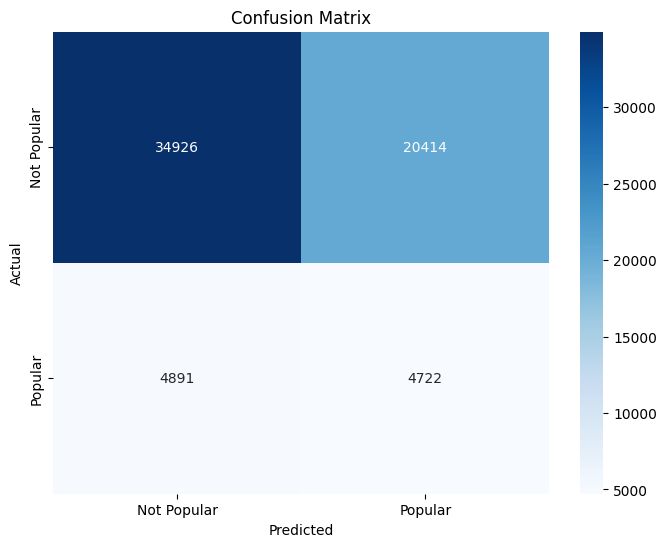

              precision    recall  f1-score   support

           0       0.88      0.63      0.73     55340
           1       0.19      0.49      0.27      9613

    accuracy                           0.61     64953
   macro avg       0.53      0.56      0.50     64953
weighted avg       0.78      0.61      0.67     64953



In [27]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Binarize predictions

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


The confusion matrix is now better

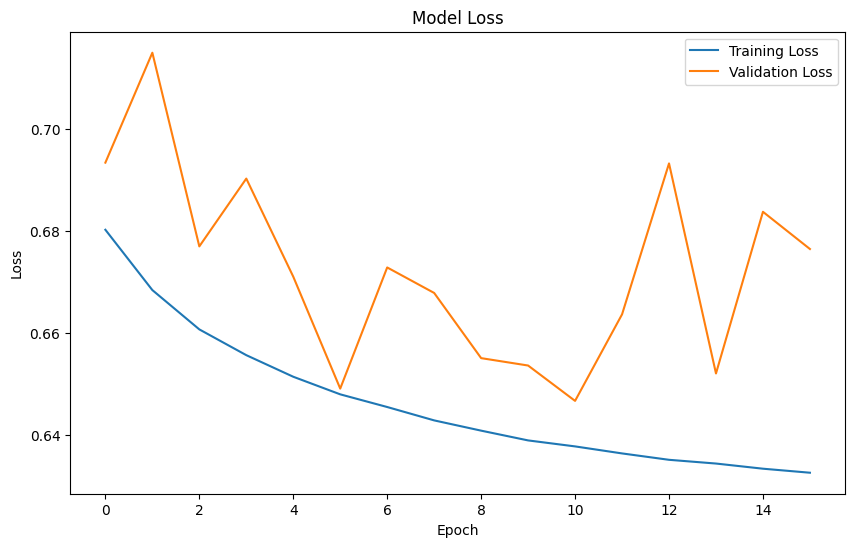

In [28]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


The training loss (blue line) decreases steadily across epochs, indicating that the model is learning from the data and adjusting weights to minimize the error on the training set. This consistent downward trend is a good sign of effective learning.

The validation loss (orange line) shows some fluctuations but generally decreases over the first several epochs. This suggests the model is improving in terms of generalization to unseen data, but the fluctuations imply some instability, 


After applying oversampling to balance the dataset, the model appears to be generalizing better.

Let's try undersampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


In [30]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


c:\Users\noemi\anaconda3\envs\DMML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Train the model
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5300 - loss: 0.6915 - val_accuracy: 0.6279 - val_loss: 0.6601
Epoch 2/20
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5528 - loss: 0.6847 - val_accuracy: 0.5510 - val_loss: 0.6837
Epoch 3/20
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5549 - loss: 0.6832 - val_accuracy: 0.5580 - val_loss: 0.6827
Epoch 4/20
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5604 - loss: 0.6816 - val_accuracy: 0.5255 - val_loss: 0.6917
Epoch 5/20
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5605 - loss: 0.6805 - val_accuracy: 0.5709 - val_loss: 0.6790
Epoch 6/20
2367/2367 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5665 - loss: 0.6792 - val_accuracy: 0.5528 - val_loss: 0.6876


2030/2030 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step
Confusion Matrix:
 [[36717 18623]
 [ 5546  4067]]


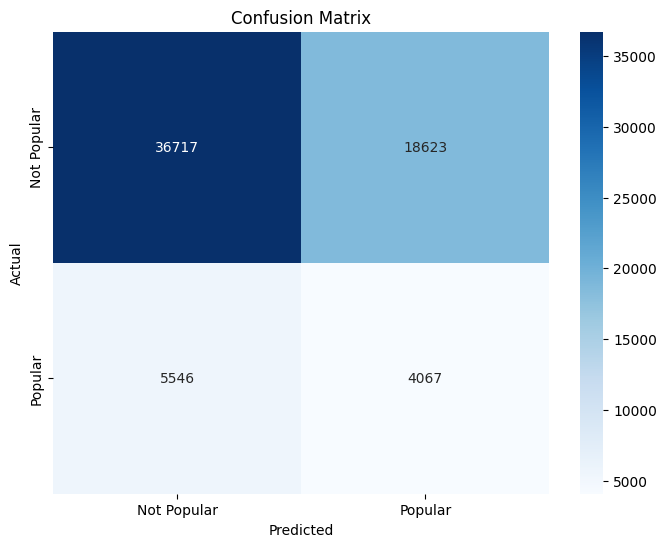

              precision    recall  f1-score   support

           0       0.87      0.66      0.75     55340
           1       0.18      0.42      0.25      9613

    accuracy                           0.63     64953
   macro avg       0.52      0.54      0.50     64953
weighted avg       0.77      0.63      0.68     64953



In [32]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Binarize predictions

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


Oversampling is slightly better than undersampling to predict popular songs

Neural networks are typically considered “black-box” models, meaning they don’t natively provide interpretable feature importance scores as decision trees or linear models do